# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
df.info()
df = df[['data_ref','sexo', 'posse_de_veiculo','posse_de_imovel','qtd_filhos','tipo_renda','educacao','estado_civil','tipo_residencia',
        'idade','tempo_emprego','qt_pessoas_residencia','renda']]
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,1193.29
14996,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,2519.18
14997,2016-03-01,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,1586.85
14998,2016-03-01,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,6975.39


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [16]:
n_meses = 3
n_clientes = 210

datas = pd.Series(pd.date_range('1/1/2015', periods = n_meses, freq = 'MS').repeat(n_clientes))

dados = df.sample(n = n_meses * n_clientes, replace=True).reset_index()

df2 = pd.concat([datas, dados], axis = 1)
df.rename({0:'data_ref'}, inplace = True, axis = 'columns')
df

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,1193.29
14996,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,2519.18
14997,2016-03-01,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,1586.85
14998,2016-03-01,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,6975.39


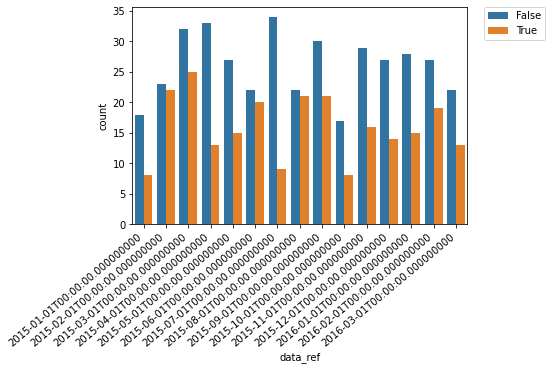

In [21]:

df2['data_ref'] = pd.to_datetime(df2['data_ref'])
df2.sort_values(by='data_ref', inplace=True)

ax = sns.countplot(x='data_ref', hue='posse_de_veiculo', data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



Se mantém bem variada, mas sempre com o False maior que o True para posse_de_veiculo durante o ano.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

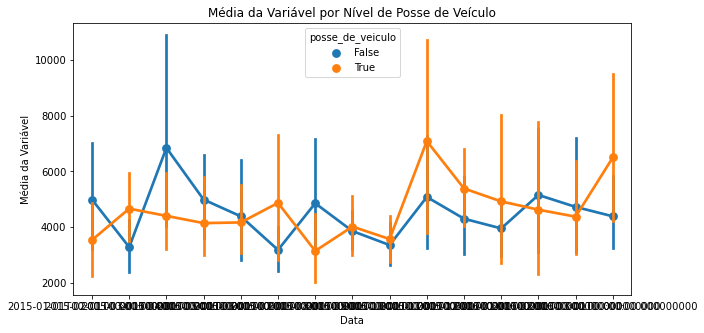

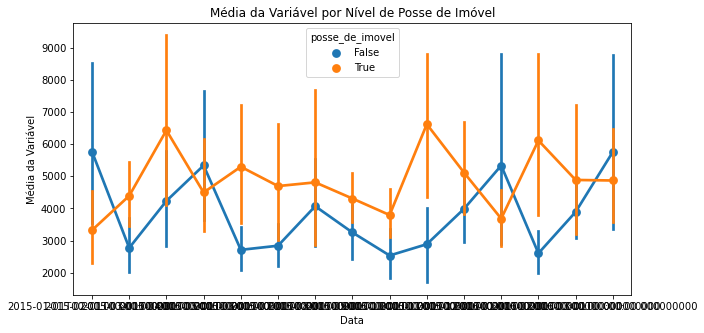

In [24]:
plt.figure(figsize=(10, 5))
sns.pointplot(x='data_ref', y='renda', hue='posse_de_veiculo', data=df2)
plt.title('Média da Variável por Nível de Posse de Veículo')
plt.xlabel('Data')
plt.ylabel('Média da Variável')
plt.show()

plt.figure(figsize=(10, 5))
sns.pointplot(x='data_ref', y='renda', hue='posse_de_imovel', data=df2)
plt.title('Média da Variável por Nível de Posse de Imóvel')
plt.xlabel('Data')
plt.ylabel('Média da Variável')
plt.show()

Podemos observar que no início do ano a posse de veículo cai, provalvemente por ser um momento de mais dividas pessoais, diferente de outubro, onde a posse de veículo aumenta muito provavelmente pela estabilidade conquistada durante o ano.

Quando olhamos para posse de imóvel, o cenário é o inverso. A posse aumenta no início do ano e cai no final do ano.